# Simple Classification

## Formal Definition of an Artificial Neuron

We define a classification problem where our two classes are **1** and **-1**. 

To simulate a simple neuron we can define an activation function $\phi(z)$ that takes a linear combination of input values $x$ and a corresponding weight vector $w$, where $z$ is the so-called net input as $z = w_{1}x_{1} + \dots + w_{m}x_{m}$. If the net input of a sample $x^{(i)}$ is greather than a defined threshold $\theta$ we predict class **1** and class **-1** otherwise.

In the perceptron algorithm the activation function $\phi(.)$ is a **unit step function** that will select **1** if $z \ge \theta$ else **-1**. To make matters simpler we can bring $\theta$ to the left side of the equation and define a **weight-zero** as $w_0=-\theta$ and $x_0=1$ so that $z = w_0x_0 + w_1x_1 + \dots + w_mx_m = w^Tx$.

We call the **negative threshold** - $w_0=-\theta$ - the **bias unit**.

## Perceptron Learning Rule

We can build a **perceptron** by following a simple algorithm:

- Initialize the weights to 0 or small random numbers
- For each training sample $x^{(i)}$:
    * Compute the output value $\hat{y}$
    * Update the weights
    
The output is the class label predicted by the **unit step function** and we can write the weights update as: $w_j:=w_j+\Delta w_j$. The value of $\Delta w_j$ is calculated as $\Delta w_j = \eta (y^{(i)}-\hat{y^{(i)}})x_{j}^{(i)}$, where:

- $\eta$ is the **learning rate***
- $y^{(i)}$ is the **true class label**
- $\hat{y^{(i)}}$ is the **predicted class label**

This means that in the case of a correct prediction the weights don't change:

$$
\Delta w_j = \eta (-1--1)x_{j}^{(i)}=0\\
\Delta w_j = \eta (1-1)x_{j}^{(i)}=0
$$

However, if the prediction is wrong the weights are pushed towards the right prediction:

$$
\Delta w_j = \eta (1--1)x_{j}^{(i)}=\eta(2)x_{j}^{(i)}\\
\Delta w_j = \eta (-1-1)x_{j}^{(i)}=\eta(-2)x_{j}^{(i)}
$$

All of this means that the weight update is **proportional** to the value of $x_{j}^{(i)}$, so we push the boundary harder if the value is larger.

After we defined the problem, we just have to translate the algo in Python. Be aware that we will update weights by considering errors in predictions.

In [11]:
%matplotlib inline

import numpy as np

class Perceptron(object):
    """Perceptron classifier.
    
    Parameters
    -----------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training set
    random_state : int
        The seed for the random number generator
        
    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting
    errors_ : list
        Number of misclassifications in each epoch
    
    """
    def __init__(self, eta=0.01, n_iter=10, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        """Fit training data.
        
        Parameters
        -----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors
        y : array-like, shape = [n_samples]
            Target values
        
        Returns
        --------
        self : object
        
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=.01, 
                              size=1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0:] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """Calculate the net input"""
        return (X @ self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """Return class label after a unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

With this class we can initialize a **Perceptron** object with a given **learning rate** ($\eta$) and number of **epochs** (**n_iter**).

The `fit` method initializes the weights to a zero vector with length of the dataset + 1 which is the zero-weight (the threshold $\theta$). After the initialization of the weights the method loops over all samples in the training set and updates the weights according to the learning rule.

The `predict` method predicts class labels, it is used in the `fit` method to update weights, but it can be used to predict classes of new data after we have fitted the model.

## Predict Iris data with the perceptron

First load data from *UCI machine learning repository*

In [5]:
import pandas as pd

df = pd.read_csv("iris.csv", header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


We will work only with the first 100 labels corresponding to **Setosa** and **Versicolor**. Let's extract them and convert them to **1** (Versicolor) and **-1** (Setosa) that we assign to a vector *y*. We also use only **sepal length** (first column) and **petal length** (third column) and assign them to a feature matrix *X*.

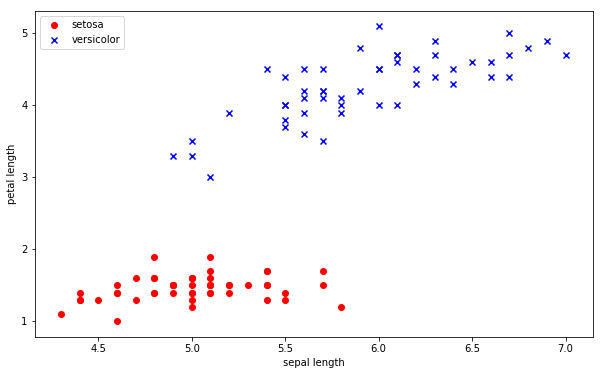

In [9]:
import matplotlib.pyplot as plt

y = df.iloc[0:100, 4].values
y = np.where(y == "Iris-setosa", -1, 1)
X = df.iloc[0:100, [0, 2]].values
plt.figure(figsize=(10, 6))
plt.scatter(X[:50, 0], X[:50, 1], color="red", marker="o", label="setosa")
plt.scatter(X[50:100, 0], X[50:100, 1], color="blue", marker="x", label="versicolor")
plt.xlabel("sepal length")
plt.ylabel("petal length")
plt.legend(loc="upper left")
plt.show()

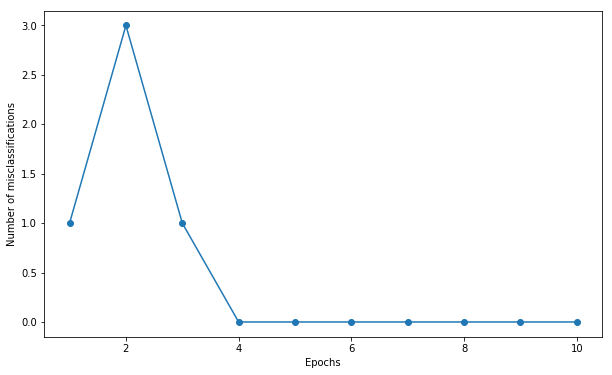

In [12]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker="o")
plt.xlabel("Epochs")
plt.ylabel("Number of misclassifications")
plt.show()

As we can see in the above plot the algorithm converged after the 5^th epoch and should be now able to classify the training samples perfectly.

Let's define a function to visualize decision boundaries for 2D datasets.

In [22]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, figsize=(10, 6), resolution=0.02):
    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.figure(figsize=figsize)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1], 
                    alpha=0.8, 
                    c=cmap(idx), 
                    marker=markers[idx], 
                    label=cl,
                    edgecolor='black')

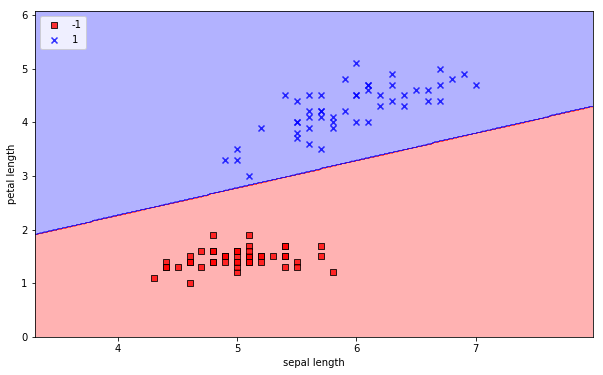

In [24]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel("sepal length")
plt.ylabel("petal length")
plt.legend(loc="upper left")
plt.show()